In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import os
print(os.listdir("../input"))



['data.csv']


Importing importannt libraries

In [ ]:
df=pd.read_csv('../input/data.csv',encoding="ISO-8859-1")
df.head(5)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


**Some Defintions for our Understanding:**

**NO2:** Combustion from power sources or Transport.

**SO2:** Coal burning, Oil burning, Manufacturing of Sulphuric acid.

**spm:** Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

**rspm:** Respirable suspended particulate matter. A sub form of spm and are responsible for respiratory diseases.

**pm2_5: **Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.



**Question 1**: Find out the states with minmum/maximum pollution parameters.

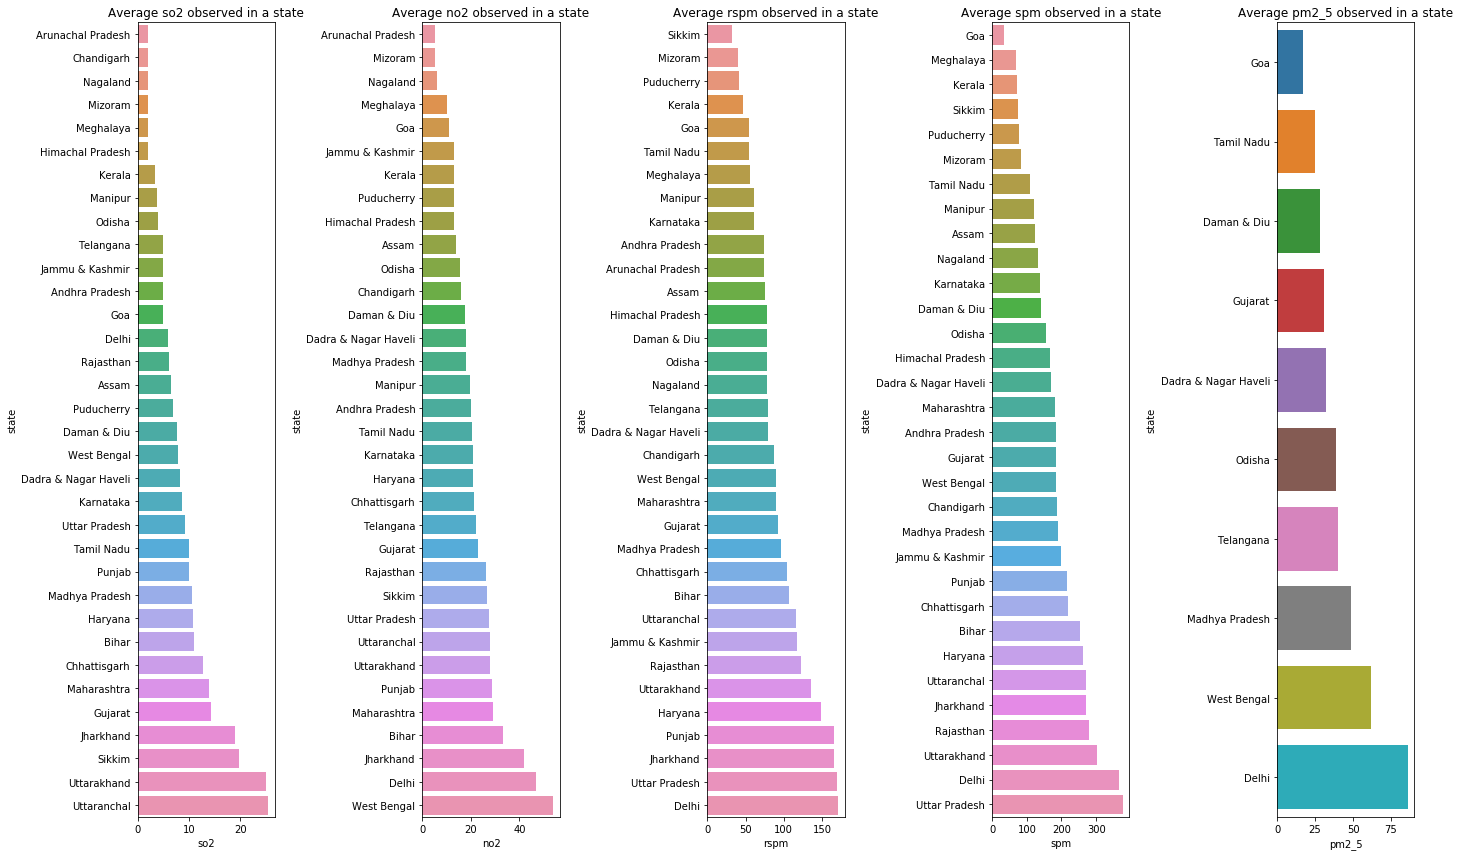

In [ ]:
fig, axes= plt.subplots(figsize=(20, 12), ncols=5)
state_wise_max_so2 = df[['state','so2']].dropna().groupby('state').median().sort_values(by='so2')
state_wise_max_no2 = df[['state','no2']].dropna().groupby('state').median().sort_values(by='no2')
state_wise_max_rspm = df[['state','rspm']].dropna().groupby('state').median().sort_values(by='rspm')
state_wise_max_spm = df[['state','spm']].dropna().groupby('state').median().sort_values(by='spm')
state_wise_max_pm2_5 = df[['state','pm2_5']].dropna().groupby('state').median().sort_values(by='pm2_5')

sns.barplot(x='so2', y=state_wise_max_so2.index, data=state_wise_max_so2, ax=axes[0])
axes[0].set_title("Average so2 observed in a state")

sns.barplot(x='no2', y=state_wise_max_no2.index, data=state_wise_max_no2, ax=axes[1])
axes[1].set_title("Average no2 observed in a state")

sns.barplot(x='rspm', y=state_wise_max_rspm.index, data=state_wise_max_rspm, ax=axes[2])
axes[2].set_title("Average rspm observed in a state")

sns.barplot(x='spm', y=state_wise_max_spm.index, data=state_wise_max_spm, ax=axes[3])
axes[3].set_title("Average spm observed in a state")

sns.barplot(x='pm2_5', y=state_wise_max_pm2_5.index, data=state_wise_max_pm2_5, ax=axes[4])
axes[4].set_title("Average pm2_5 observed in a state")
plt.tight_layout()

**GOA looks a suitable location overall :)**

**Q2:** Top TEN Cities have higest risk of respiratory diseases?

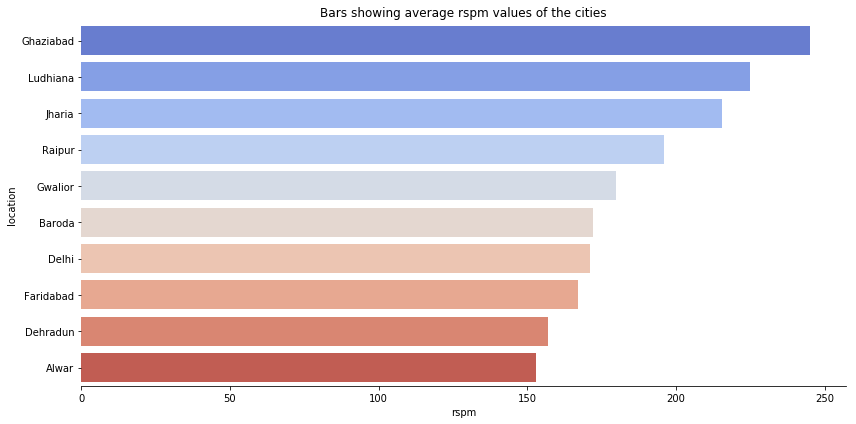

In [ ]:
state = df[['state','location','rspm']].groupby(['state','location']).median().reset_index()
state_location_max_rspm = state.loc[state.groupby('state')['rspm'].idxmax()].sort_values(by='rspm', ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='rspm', y= 'location', data=state_location_max_rspm, palette='coolwarm', axes=ax)
sns.despine(left=True)
ax.set_title("Bars showing average rspm values of the cities")
plt.tight_layout()

**Q3:** Show RSPM variation in ghaziabad over time

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


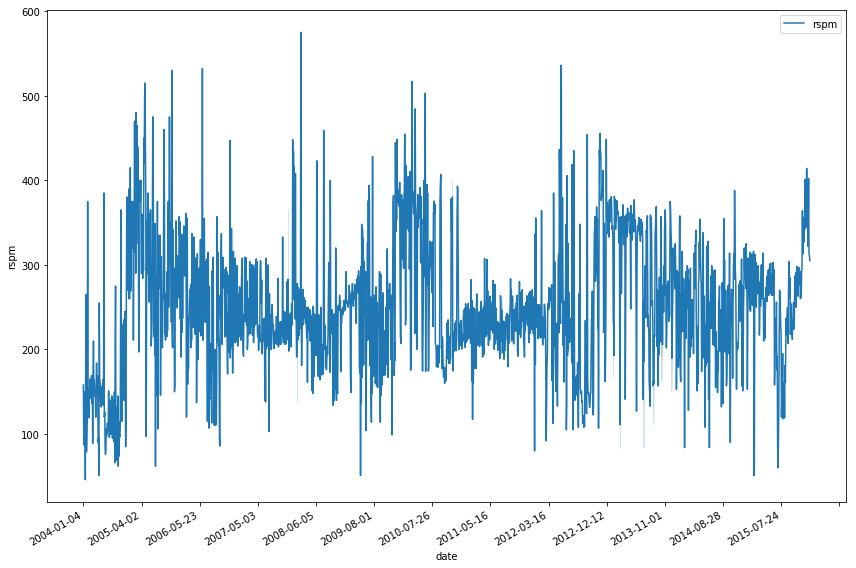

In [ ]:
rspm_data = df[df['location']=="Ghaziabad"][['date', 'rspm']].dropna()
fig, ax = plt.subplots(figsize=(12,8))
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
sns.lineplot(x='date', y='rspm', data=rspm_data, axes=ax, label="rspm")
fig.autofmt_xdate()
plt.tight_layout()

**Q4: **Top five states with highest number of monitoring stations 

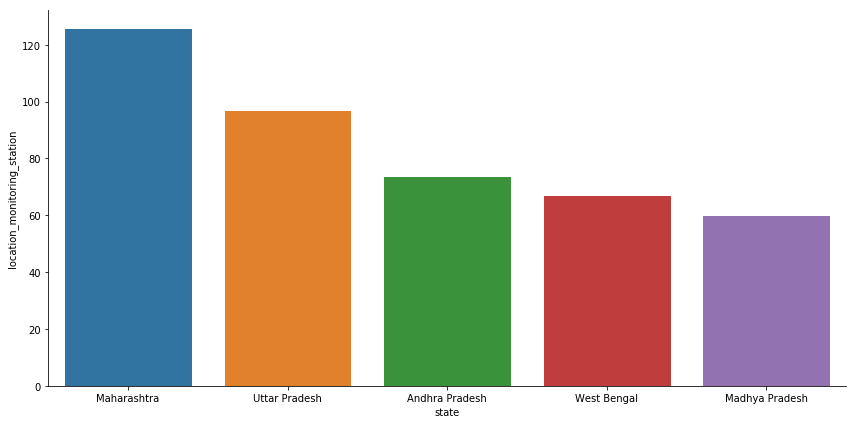

In [ ]:
mon_station = df.drop_duplicates(subset=['location_monitoring_station'])
grouped_mon_station= mon_station[['state', 'location_monitoring_station']].groupby('state').count().sort_values(by='location_monitoring_station', ascending=False).head(5)
fig,ax = plt.subplots(figsize=(12,6))
sns.set_style("dark")
sns.barplot(x=grouped_mon_station.index, y='location_monitoring_station', data=grouped_mon_station, axes=ax)
sns.despine()
plt.tight_layout()

**Q5:** Top 5 sampling stations to produce highest samples

In [ ]:
location_mon = df[['state', 'location_monitoring_station', 'date']].groupby(['state','location_monitoring_station']).count().reset_index()
location_mon.loc[location_mon.groupby('state')['date'].idxmax()].sort_values(by='date', ascending=False).head(5)


,state,location_monitoring_station,date
287,Himachal Pradesh,Paonta Sahib,1599
656,Odisha,Regional Office,1441
98,Assam,"Head Office, Bamunimaidan, Guwahati",1327
472,Maharashtra,"Bank of Baroda Building, Near Pimpri-Chinchwad...",1273
937,Uttar Pradesh,Taj Mahal,1134


**Q4:** 5 sampling stations to produce least samples

In [ ]:
location_mon = df[['state', 'location_monitoring_station', 'date']].groupby(['state','location_monitoring_station']).count().reset_index()
location_mon.loc[location_mon.groupby('state')['date'].idxmax()].sort_values(by='date').head(5)


,state,location_monitoring_station,date
778,Sikkim,White Hall Complex,1
74,Arunachal Pradesh,Compound of APSPCB office building,45
591,Manipur,Secretariat Building,76
958,Uttaranchal,Clock Tower,258
151,Dadra & Nagar Haveli,"Khadoli Industrial Area, Village- Khadoli, Sil...",309


**Q5:** Check if there is some correlation between so2 and no2 variation.

I am taking a sample of one city for this purpose instead of taking whole data.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


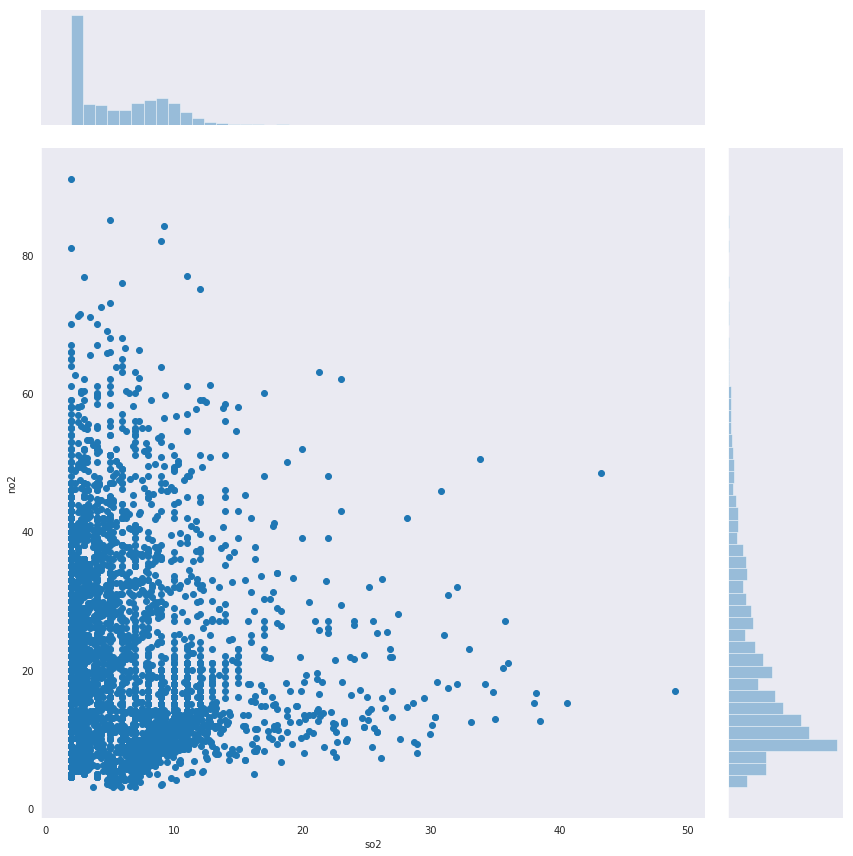

In [ ]:
relation_df_so2_no2 = df[(df['state']=='Uttar Pradesh') & (df['location'] == 'Agra')][['so2','no2']].dropna()
sns.jointplot( x='so2', y='no2', data=relation_df_so2_no2 , size=12)